# Visualisation of Performance of Pytorch calculations

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

In [8]:
n_c = 1000
run = 46

In [9]:
tf_files_dir = "/Users/dj/Documents/GitHub/Master_Thesis/Code/SynDat_HBL/runs/"
dataset = "syndat"
main_dir = os.path.join(tf_files_dir, dataset)
for config_name in os.listdir(main_dir)[1:2]:
    total_path = os.path.join(tf_files_dir, dataset, config_name)
    eventfile_name = os.listdir(total_path)[1]

    # Is this correct? I took this part of code from another website.
    DEFAULT_SIZE_GUIDANCE = {
            "compressedHistograms": 1,
            "images": 1,
            "scalars": 0,  # 0 means load all
            "histograms": 1,
        }

    event_acc = EventAccumulator(total_path, DEFAULT_SIZE_GUIDANCE)
    event_acc.Reload()

    for tag in event_acc.Tags()['scalars']:
        values = event_acc.Scalars(tag)

        values_np = np.zeros((len(values), 1))

        for ti, tl in enumerate(values):
            values_np[ti,0] = tl.value
    

        numpy_save_dir = f'/Users/dj/Documents/GitHub/Master_Thesis/Code/SynDat_HBL/runs/syndat/test/numpy_save{n_c}_{run}/'
        new_tag = tag.replace('/','_')
        value_dir = os.path.join(numpy_save_dir, new_tag)
        if not os.path.exists(value_dir):
            os.makedirs(value_dir)

        file_name = os.path.join(value_dir, config_name)
        np.save(file_name, values_np)


# Visualisation

In [10]:
# n_c = 100
# run = 7

In [11]:
acc_test = np.load(f"/Users/dj/Documents/GitHub/Master_Thesis/Code/SynDat_HBL/runs/syndat/test/numpy_save{n_c}_{run}/Accuracy_test/test.npy")
acc_train = np.load(f"/Users/dj/Documents/GitHub/Master_Thesis/Code/SynDat_HBL/runs/syndat/test/numpy_save{n_c}_{run}/Accuracy_train/test.npy")
loss_test = np.load(f"/Users/dj/Documents/GitHub/Master_Thesis/Code/SynDat_HBL/runs/syndat/test/numpy_save{n_c}_{run}/Loss_test/test.npy")
loss_train = np.load(f"/Users/dj/Documents/GitHub/Master_Thesis/Code/SynDat_HBL/runs/syndat/test/numpy_save{n_c}_{run}/Loss_train/test.npy")


x_train = np.arange(1,len(loss_train) + 1)
x_test = np.arange(1,len(loss_test) + 1)

Text(0.5, 1.0, 'Loss Train')

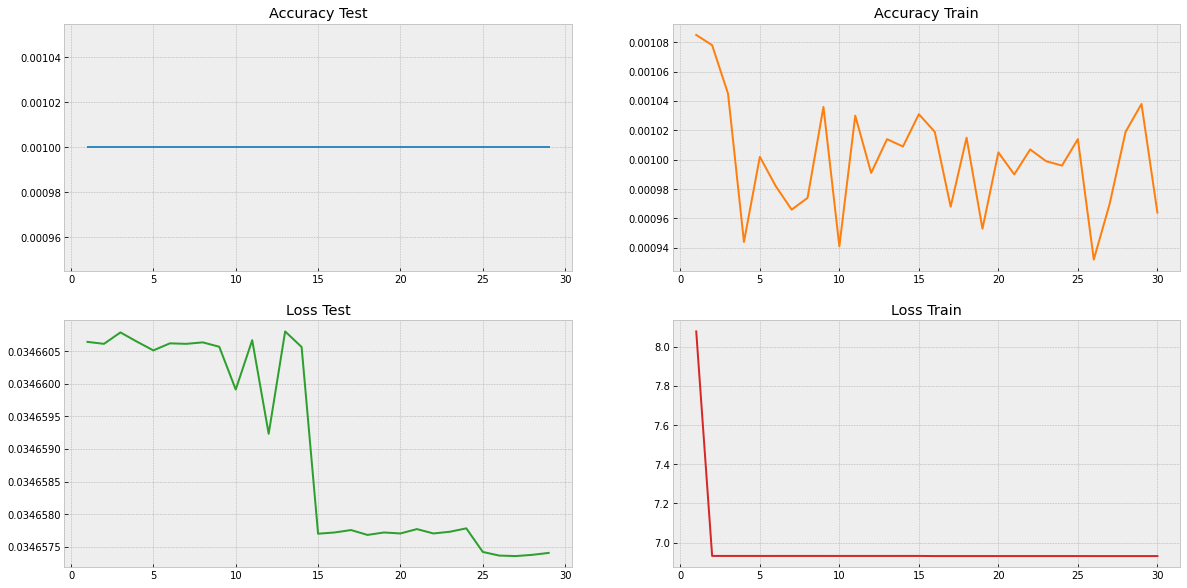

In [12]:
style.use('bmh')

fig, axs = plt.subplots(2, 2,figsize=(20,10))
axs[0, 0].plot(x_test, acc_test)
axs[0, 0].set_title('Accuracy Test', color='black')
axs[0, 1].plot(x_train, acc_train, 'tab:orange')
axs[0, 1].set_title('Accuracy Train', color='black')
axs[1, 0].plot(x_test, loss_test, 'tab:green')
axs[1, 0].set_title('Loss Test', color='black')
axs[1, 1].plot(x_train, loss_train, 'tab:red')
axs[1, 1].set_title('Loss Train', color='black')
#fig.tight_layout()

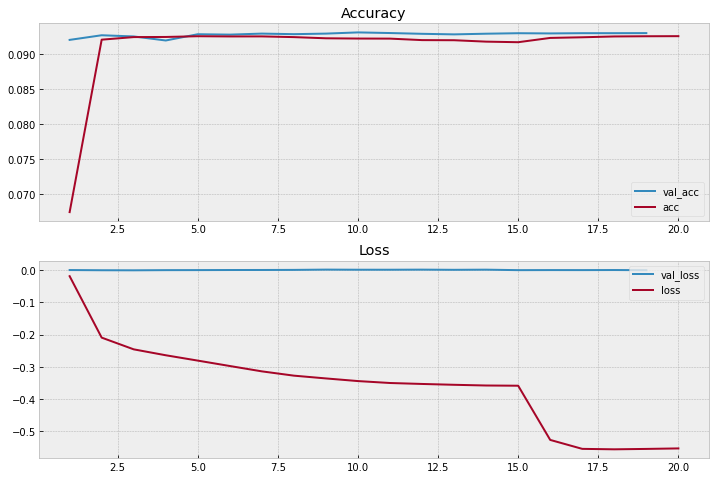

In [72]:
fig = plt.figure(figsize=(12,8))

ax1 = plt.subplot2grid((2,1), (0,0))
ax2 = plt.subplot2grid((2,1), (1,0), sharex = ax1)

ax1.plot(x_test, acc_test, label = 'val_acc')
ax1.plot(x_train, acc_train, label = 'acc')
ax1.set_title('Accuracy', color='black')
ax1.legend(loc=4)

ax2.plot(x_test, loss_test, label = 'val_loss')
ax2.plot(x_train, loss_train, label = 'loss')
ax2.set_title('Loss', color='black')
ax2.legend(loc=1)

In [29]:
print(len(loss_train))
print(len(loss_test))

15
14
